

 <h1>  <center> <b> Speech Systems (EE6307) </b> </center>

<dt> <h4> <b> Programming Assignment - 05 : Statistical and Deep Learning approaches to Automatic Speaker Verification </b> </h4> </dt>


<dt> <h4>  $\underline{\textbf{Objective}}$:
Welcome to the fifth programming assignment in the speech systems (EE6307) course. The current programming assignment expects you to automate the speaker verification system (ASV). Automatic speaker verification is the task of verifying the claimed identity of a speaker based on their voice characteristics. In simpler words, Given two utterances, The ASV system should output a binary value saying whether they came from the same speaker or not. The current programming assignment is broadly classified into two parts. In the first part of the programming assignment, you need to code an algorithm to automate the speaker verification system using GMM-UBM models. The second part of the programming assignment requires you to design discriminative methods ( X-vector ) for the ASV system. Compare the generative ( GMM-UBM) with discriminative ( X-vector ) models for ASV, and write down your observations. </h4> </dt>

<dt> <h4>  <b> $\underline{\textbf{Instructions}}$: </b> Please follow these instructions </h4> </dt>
<dd> <h4>  1. Plagiarism is strictly prohibited. </h4> </dd>
<dd> <h4>  2. Delayed submissions will be penalized with a scaling factor of 0.5 per day. </h4> </dd>
<dd> <h4>  3. Please DO NOT use any machine learning libraries unless and otherwise specified. </h4> </dd>







<h4> <b> Statistical approaches to speaker verification (GMM-UBM models) : </b>  This section describes the steps required to build an ASV system using GMM-UBM models. As the primary goal of the programming assignment is to build an ASV system and understand its pros and cons, We request you use either your previous assignment codes or built-in codes from python packages to extract the features. You can also use the scikit-learn package to estimate the parameters of GMM models. Please download the data from the below link and go through the Readme file for finer details i.e, data for training the UBM model, data for evaluating the ASV system  </h4>

[link to data](https://drive.google.com/drive/folders/1nhQfO_4s7egw9BPrWW_zbMeUv9OwvRnP?usp=drive_link)

<dt> <h4> 1. Feature Extraction </h4> </dt>
<dd> <h4> - Extract 30-dimensional Mel Frequency Cepstral Coefficients (MFCCs) from the speech signal. Add delta (velocity) and delta-delta (acceleration) coefficients to include the formant dynamics in the features. Use the following parameters for extracting the features. Framesize = 25 msec, Frameshift = 10 msec and number of mel filter banks = 40  </h4> </dd>
<dt> <h4> 2. Feature preprocessing </h4> </dt>
<dd> <h4> - Process the features using cepstral mean-variance normalization (CMVN) to remove the convolutive noise. Use the optimal window in CMVN preprocessing. Typically it is preferred to use 3 seconds.   </h4> </dd>
<dd> <h4> - Voice Activity Detector (VAD): Silence regions in the speech signal will not contain speaker information, and including them in GMM modeling will deteriorate the performance. Hence, remove the silence/noise frames using an energy-based voice activity detector module  </h4> </dd>
<dt> <h4> 2. Universal Background Modeling (UBM) </h4> </dt>
<dd> <h4> - Let us consider a Gaussian Mixture Model (GMM) with 128 Gaussians.  </h4> </dd>
<dd> <h4> - Estimate the parameters of the GMM model from large number of background speakers. Make sure that the background speakers are not involved in testing.   </h4> </dd>
<dd> <h4> - Speech data from 100 speakers are provided to estimate the UBM parameters. If you do not have sufficient computational resources, please use less number of speakers to estimate the parameters.   </h4> </dd>
<dt> <h4> 2. Speaker-specific GMM's </h4> </dt>
<dd> <h4> - Inputs : Trained UBM model i.e $\lambda^{ubm}$ and speaker training data i.e X   </h4> </dd>
<dd> <h4> - Stats estimation from UBM model: Compute the responsibility of the Gaussians with the initial estimates as UBM parameters </h4> </dd>
<dd> <h4> <center> $\gamma_{nk}$ = $\frac{\pi_{k}^{ubm} N ( x_{n} / \mu_{k}^{ubm} , \sigma_{k}^{2} )}{ \sum_{m=1}^{M} \pi_{m}^{ubm} N ( x_{n} / \mu_{m}^{ubm} , \sigma_{m}^{2} ) }$ </center> </h4> </dd>
<dd> <h4> where $\gamma_{nk}$ represents the responsibility of $k^{th}$ gaussian in generating $n^{th}$ data point and {$ \pi_{m}^{ubm} , \mu_{m}^{ubm} , \sigma_{m}^{2} $} are the UBM parameters    </h4> </dd>

<dd> <h4> - EM update for $\mu_{k}$ and  $\pi_{k}$: Estimate the parameters of the GMM { $\mu_{k}$,$\pi_{k}$ } using the available speaker's data  </h4> </dd>
<dd> <h4> <center> $\mu_{k}^{em}$ = $\frac{1}{N_{k}}$ $\sum_{n=1}^{N}$ $\gamma_{nk}x_{n}$ </center>
<center> $\pi_{k}^{em}$ = $\frac{\sum\limits_{n=1}^{N} \gamma_{nk}}{N} $ </center>  </h4> </dd>

<dd> <h4> - MAP update : Considering the UBM model as the prior information, The MAP adaption results in the following updates to zeroth order{$\pi_{k}$} and first-order statistics ($\mu_{k}$)   </h4> </dd>
<dd> <h4> <center> $\mu_{k}^{spk}$ = $\alpha\mu_{k}^{em}$ + $(1-\alpha)\mu_{k}^{ubm}$ </center> <br>
<center> $\pi_{k}^{spk}$ = $\alpha\pi_{k}^{em}$ + $(1-\alpha)\pi_{k}^{ubm}$ </center>   </h4> </dd>
<dd> <h4>  Where $\alpha$ is given by $\frac{N_{k}}{N_{k} + r}$ and "r" is the relevance factor.  </h4> </dd>

<dt> <h4> 3. Compute the likelihood ratio </h4> </dt>
<dd> <h4> - Estimate the score for the hypothesis that the given speaker came from the hypothesized speaker  </h4> </dd>
<dd> <h4> - Let X be the set of feature vectors from the test utterance  </h4> </dd>
<dd> <h4> - Let k be the claimed identity of the speaker.
<dd> <h4> - H0 = Feature set X is from speaker k  </h4> </dd>
<dd> <h4> - H1 = Feature set X is not from speaker k   </h4> </dd>
<dd> <h4> - Hypothesis testing based on likelihood ratio   </h4> </dd>

<dd> <h4>
</br>
<center>  $\frac{P(X/\lambda_{k})}{P(X/\lambda_{\bar{k}})}$ >= $\theta$ accepts H0 </center> </br>
<center>  $\frac{P(X/\lambda_{k})}{P(X/\lambda_{\bar{k}})}$ < $\theta$ reject H0 </center>  <br>
</h4> </dd>

<dd> <h4> $\lambda_{k}$ denotes model estimated from reference utterance of k. </h4> </dd>
<dd> <h4> $\lambda_{\bar{k}}$ denotes model estimated from entire world except k. Let us consider UBM model here. </h4> </dd> </h4> </dd>

<dt> <h4> 4. Performance Evaluation :  </h4> </dt>

<dd> <h4> - Speech data from 40 speakers are provided to evaluate the ASV performance </h4> </dd>
<dd> <h4> - Compute Equal Error Rate (EER) to evaluate the developed ASV system.  </h4> </dd>
<dd> <h4> - Please do evaluate the EER on the set of verification trials ( 1000 trials ) and report it  </h4> </dd>

<dt> <h4> 5. Optinal :  </h4> </dt>

<dd> <h4> - Experiment with varying amount of speech data in UBM modeling </h4> </dd>
<dd> <h4> - Does it depends on the number of speakers in the UBM data or the amount of speech in it ? </h4> </dd>
<dd> <h4> - Report your observations </h4> </dd>




In [1]:
#################################
#Import all the modules
#################################
import numpy as np
import soundfile as sf
from numpy.lib import stride_tricks
import matplotlib.pyplot as plt
import os
from glob import glob
from sklearn import mixture
import librosa
from torch.utils.data import Dataset
import torch
import pickle
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import roc_curve 

In [36]:
#################################
# Functions for preprocessing data
#################################

def get_frames(sig, rate, frameSize=0.025, hopSize=0.01):
    
    frameSize = int(rate * frameSize)
    hopSize = int(rate * hopSize)

    # Calculate the number of frames
    num_frames = 1 + (len(sig) - frameSize) // hopSize
    shape = (num_frames, frameSize)
    strides = (sig.strides[0] * hopSize, sig.strides[0])

    # Create the frames using strides
    Frames = stride_tricks.as_strided(sig, shape=shape, strides=strides)

    # Check if the last frame is full-sized; if not, pad with zeros
    last_frame_start = num_frames * hopSize
    if last_frame_start + frameSize > len(sig):
        # Calculate the number of zeros to pad
        pad_size = last_frame_start + frameSize - len(sig)
        last_frame = np.concatenate((sig[last_frame_start:], np.zeros(pad_size)))
        Frames = np.vstack((Frames, last_frame))  # Add the last frame

    return Frames



def Energy(frame):
    """
    Returns the energy of the signal

    :frame:
      a fixed window of speech signal
    """
    energy = np.dot(frame, frame)

    return energy


def remove_silence(frame, energy_threshold):

    if Energy(frame) < energy_threshold:
        frame.fill(0)

    return frame
    ##########################################################


def CMVN(frames):
    # Compute mean across the frames
    mean = np.mean(frames, axis=0)

    # Compute variance using broadcasting
    variance = np.mean((frames - mean) ** 2, axis=0)

    # Normalize frames
    normalized_frames = (frames - mean) / np.sqrt(variance + 1e-6)

    return normalized_frames




def get_feature_vector(sig, rate, FrameSize = 0.025, FrameShift = 0.01):

#   Frames = get_frames(sig, rate, FrameSize, FrameShift)
    Frames = librosa.util.frame(sig, frame_length=int(rate*FrameSize), hop_length=int(rate*FrameShift)).T
    frame_energies = np.apply_along_axis(Energy, axis=1, arr=Frames)

    energy_threshold = (max(frame_energies)- min(frame_energies))* 0.05

    mask = frame_energies >= energy_threshold

    # Use the mask to filter frames
    filtered_frames = Frames[mask]
    # Choose first 30 mfcc coefficients 
    mfcc_coeffs = librosa.feature.mfcc(y=filtered_frames, sr=rate, n_mels = 40, n_mfcc = 30, n_fft = 400)[:,:,0]
    normalized = CMVN(mfcc_coeffs)
    delta = librosa.feature.delta(normalized)
    delta_delta = librosa.feature.delta(normalized, order=2) 
    #   velocity_coeffs = velocity_coefficients(normalised, 4)
    #   acceleration_coeffs = acceleration_coefficients(velocity_coeffs, 4)

    return np.hstack((mfcc_coeffs, delta, delta_delta))


<h2> <u>Silent region analysis <u></h2>

0.07874317729845644


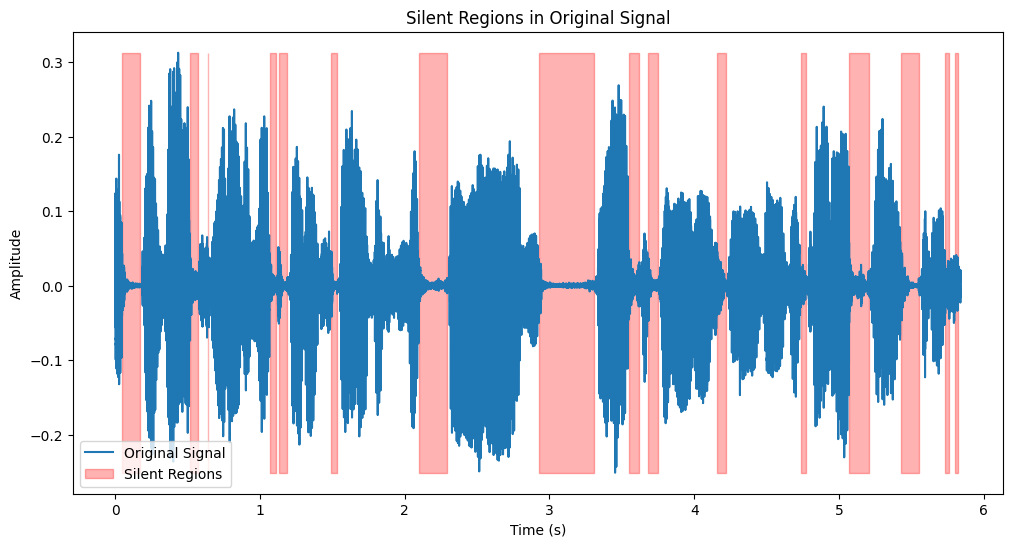

In [81]:
sig, rate = sf.read('UBM_data/id10057/De_ja_6VmYs/00001.wav')

FrameSize = int(0.025 * rate)  
FrameShift = int(0.01 * rate)  

Frames = get_frames(sig, rate, 0.025, 0.01)

frame_energies = np.apply_along_axis(Energy, axis=1, arr=Frames)

energy_threshold = (max(frame_energies) - min(frame_energies)) * 0.02
print(energy_threshold)
mask = frame_energies >= energy_threshold

# Use the mask to filter frames
filtered_frames = Frames[mask]
time = np.arange(len(sig)) / rate
frame_times = np.arange(len(frame_energies)) * FrameShift / rate

plt.figure(figsize=(12, 6))
plt.plot(time, sig, label="Original Signal")
plt.fill_between(frame_times, np.min(sig), np.max(sig), where=~mask, color='r', alpha=0.3, label="Silent Regions")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title("Silent Regions in Original Signal")
plt.show()

In [82]:
data_path = 'UBM_data'

def read_dir(root_path):

  data = np.array([0]*90)
  labels = []

  for dirpath, dirnames, filenames in os.walk(root_path):
    
    for file in filenames:
        
        if file == '.DS_Store':
          continue
        
        sig, rate = sf.read(os.path.join(dirpath, file))
        feature_vector = get_feature_vector(sig, rate)
        label = dirpath.split('\\')[1][2:]
        data = np.vstack((data,feature_vector))
        
        for _ in range(feature_vector.shape[0]):
          labels.append(label)

  data =  data[1:,:]
  labels = np.array(labels)
  
  return data, labels

class UBMDataset:

  def __init__(self, data_dir):
    self.data, self.labels = read_dir(data_dir)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx], self.labels[idx]

In [83]:
UBM_dataset = UBMDataset(data_path)

In [84]:
with open('UBM_dataset.pkl', 'wb') as f:
    
    pickle.dump(UBM_dataset, f)

In [ ]:
# with open('UBM_dataset.pkl', 'rb') as f:
    
#     UBM_dataset = pickle.load(f)

In [85]:
UBM_dataset.data.shape

(4399760, 90)

In [ ]:
num_rows = UBM_dataset.data.shape[0]
# Randomly select 10,00,000 unique row indices
random_indices = np.random.choice(num_rows, size= 1000000, replace=False)

# Use the indices to select the rows
UBM_data = UBM_dataset.data[random_indices]

In [ ]:
UBM_model = mixture.GaussianMixture(
    n_components = 128, 
    covariance_type='diag', 
    verbose = 2, 
    verbose_interval = 1,
    max_iter= 200
    )

In [ ]:
# Train UBM model on data
UBM_model.fit(UBM_data)

Initialization 0
  Iteration 1	 time lapse 67.57394s	 ll change inf
  Iteration 2	 time lapse 6.61243s	 ll change 5.50435
  Iteration 3	 time lapse 5.97636s	 ll change 4.21506
  Iteration 4	 time lapse 5.97789s	 ll change 3.54869
  Iteration 5	 time lapse 5.98350s	 ll change 1.96121
  Iteration 6	 time lapse 5.96004s	 ll change 0.91164
  Iteration 7	 time lapse 6.02086s	 ll change 0.49220
  Iteration 8	 time lapse 6.01580s	 ll change 0.30349
  Iteration 9	 time lapse 5.96798s	 ll change 0.20535
  Iteration 10	 time lapse 6.00619s	 ll change 0.14829
  Iteration 11	 time lapse 5.99967s	 ll change 0.11397
  Iteration 12	 time lapse 6.02112s	 ll change 0.09053
  Iteration 13	 time lapse 5.99678s	 ll change 0.07416
  Iteration 14	 time lapse 6.03430s	 ll change 0.06217
  Iteration 15	 time lapse 6.00065s	 ll change 0.05337
  Iteration 16	 time lapse 6.03224s	 ll change 0.04664
  Iteration 17	 time lapse 6.01323s	 ll change 0.04137
  Iteration 18	 time lapse 6.00707s	 ll change 0.03668
  Ite

GaussianMixture(covariance_type='diag', max_iter=200, n_components=128,
                verbose=2, verbose_interval=1)

In [ ]:
# Store model parameters
ubm_mean = UBM_model.means_
ubm_sigma = UBM_model.covariances_
ubm_pi = UBM_model.weights_


In [ ]:
# # Save trained model weights
# with open("ubm_mean.pkl", "wb") as f:
#     pickle.dump(ubm_mean, f)

# with open("ubm_cov.pkl", "wb") as f:
#     pickle.dump(ubm_sigma, f)
    
# with open("ubm_pi.pkl", "wb") as f:
#     pickle.dump(ubm_pi, f)

In [ ]:
# Load evaluation dataset
eval_dataset = UBMDataset('evaluation_data')

In [ ]:
## Save dataset for later use
# with open('UBM_eval_dataset.pkl', 'wb') as f:
    
#     pickle.dump(eval_dataset, f)

In [ ]:
eval_speaker_ids = set(eval_dataset.labels)

relevance_factor = 16
n_components = 128
alpha = n_components/ (n_components + relevance_factor)

speaker_specific_models = {}

labels = np.array(eval_dataset.labels)

for speaker in eval_speaker_ids:
    
    # Initialize speaker specific model
    speaker_specific_models[speaker] = mixture.GaussianMixture(128, covariance_type='diag', max_iter = 1)
    
    # Initialize with UBM parameters
    speaker_specific_models[speaker].means_ = np.copy(ubm_mean)
    speaker_specific_models[speaker].covariances_ = np.copy(ubm_sigma)
    speaker_specific_models[speaker].weights_ = np.copy(ubm_pi)
    
    # Perform 1 EM iteration
    data = eval_dataset.data[np.where(labels == speaker)]
    speaker_specific_models[speaker].fit(data)
    
    # Update means and pi's using MAP update while keeping covariances same as the UBM covariance
    speaker_specific_models[speaker].means_ = (1 - alpha) * speaker_specific_models[speaker].means_ + alpha * ubm_mean
    speaker_specific_models[speaker].weights_ = (1 - alpha) * speaker_specific_models[speaker].weights_ + alpha * ubm_pi
    speaker_specific_models[speaker].covariances_ = np.copy(ubm_sigma)
    
    

c:\Users\prana\OneDrive\Desktop\IITHyderabad\Speech Systems\myenv\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\prana\OneDrive\Desktop\IITHyderabad\Speech Systems\myenv\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\prana\OneDrive\Desktop\IITHyderabad\Speech Systems\myenv\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
c:\Users\prana\OneDrive\Desktop\IITHyderabad\Speech Systems\myenv\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Be

In [104]:
labels = []
speaker = []
test_utterance = []
with open('Verification_trials.txt', 'r') as f:
    
    for lines in f:
        
        line = lines.split(' ')
        labels.append(int(line[0]))
        speaker.append('evaluation_data/'+ line[1])
        test_utterance.append('evaluation_data/'+ line[2][:-1])     

In [105]:
## Function to compute log-likelihood ratio
def log_likelihood_ratio(x, speaker):
    
    return np.mean(speaker_specific_models[speaker].score_samples(x)) , np.mean(UBM_model.score_samples(x))

In [106]:
log_ratio = []
spk_ids = np.array(eval_dataset.labels)

for index, s in enumerate(speaker):
    
    s = s.split('/')[1][2:]
    sig, rate = sf.read(test_utterance[index])
    data = get_feature_vector(sig, rate)
    log_ratio.append(log_likelihood_ratio(data, s))
    
    

In [107]:
y_score =  np.array([x-y for x, y in log_ratio])
y  = labels
fpr, tpr, thresholds = roc_curve(y, y_score, pos_label=1)

eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, thresholds)(eer)

threshold = thresh

eer, thresh

(0.4563894523326477, array(-8.93339904))

In [108]:
y_true = np.array(labels)
# Convert predictions to binary values based on the threshold
y_pred_labels = (y_score >= threshold).astype(int)
# Calculate False Acceptance Rate (FAR) - proportion of negatives misclassified as positives
false_accepts = np.sum((y_pred_labels == 1) & (y_true == 0))

total_negatives = np.sum(y_true == 0)

far = false_accepts / total_negatives if total_negatives > 0 else 0

# Calculate False Rejection Rate (FRR) - proportion of positives misclassified as negatives
false_rejects = np.sum((y_pred_labels == 0) & (y_true == 1))
total_positives = np.sum(y_true == 1)
frr = false_rejects / total_positives if total_positives > 0 else 0

far, frr


(np.float64(0.4536489151873767), np.float64(0.4563894523326572))

<h4> <b> Descriminative approaches to speaker verification (x-vector model) : </b>  This section describes the steps required to extract speaker embedding using the DNN framework. Please use the PyTorch toolkit for this assignment.

<dt> <h4> <b> Feature Extraction </b> <dt> <h4>
<dt> <h4> 1. Extract 64-dimensional log-Mel filter bank energies from the speech signal and use them as features to train the speaker classification network
  </h4> </dt>

<dt> <h4> <b> Architecture </b> <dt> <h4>
<dt> <h4> 1. Frame Level Layers </h4> </dt>
<dd> <h4> - Four layers of 1D CNN layers to extract high level speaker discriminative representations from the feature vectors.   </h4> </dd>
<dt> <h4> 2. Stats Pooling Layer </h4> </dt>
<dd> <h4> - Computes temporal mean and variance of framelevel representations to extract fixed dimensional embedding from the variable length representations.  </h4> </dd>
<dt> <h4> 3. Segment level layers </h4> </dt>
<dd> <h4> - A pair of fully connected layers and output layer as a classifier. The activations of first or second fully connected layers is considered as x-vector.</h4> </dd>
<dt> <h4> <b> Dataset

[link to data](https://drive.google.com/drive/folders/1nhQfO_4s7egw9BPrWW_zbMeUv9OwvRnP?usp=drive_link)

<dt> <h4> 1. Training data : Speech from 100 speakers is provided to train the speaker classification network. Training data is available in "UBM_data" folder.
  </h4> </dt>
  <dt> <h4> 2. Testing data : Speech from 40 speakers is provided to test the ASV system.
  </h4> </dt>
<dt> <h4> <b> Training </b> <dt> <h4>
<dt> <h4> 1. Write a dataset loader to pass the features to the network  </h4> </dt>
<dt> <h4> 2. As it is not possible to form the batch with variable length speech signal, typically, it is preferred to obtain a chunk ( 2 to 6 seconds ) of data from each utterance and form batches to train the network. Please follow the same for training the network.    </h4> </dt>
<dt> <h4> 3. Compute cross entropy loss between true and predicted labels and use adam optimizer to train the network </h4> </dt>
<dt> <h4> <b> Inference (Testing) </b> <dt> <h4>
<dt> <h4> 1. Discard the logistic classification layer and extract speaker embeddings from the outputs of the dense layer in segment-level layers for both claimed identity and test utterance
 </h4> </dt>
<dt> <h4> 2. Perform the cosine scoring between claimed identity ( enroll ) and test embeddings to compute the speaker similarity between them </h4> </dt>
<dt> <h4> 3. Compute Equal Error Rate (EER) to quantify the performance of the ASV system. </h4> </dt>

<dt> <h4> <b> Optional </b> <dt> <h4>

<dt> <h4> 1. Replace the stats pooling layer with self-attentive stats pooling layer and observe the performance improvement. Self-attentinve pooling weights different frames based on their ability of representing the speaker information. </h4> </dt>
<dt> <h4> 2. What did you observe from the self-attentive pooling experiments ? </h4> </dt>
<dt> <h4> 3. Experiment with different frame-level encoders and report your observations. </h4> </dt>
<dt> <h4> 4. Please report your observations on descrimatinve approaches to speaker verification </h4> </dt>


In [185]:

import torch
import torchaudio
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Parameter

#####################################################
#Network Architecture
#####################################################
class Xvector(nn.Module):
    #################################################
    ##Takes input as wave file and produces speaker logits
    #################################################
    def __init__(self):
        super(Xvector, self).__init__()

        self.numSpk = 100
        self.n_mels     = 64
        self.log_input  = True

        self.instancenorm   = nn.InstanceNorm1d(self.n_mels)
        self.torchfb        = torch.nn.Sequential(
                torchaudio.transforms.MelSpectrogram(sample_rate=16000, n_fft=512, win_length=400, hop_length=160, window_fn=torch.hamming_window, n_mels=self.n_mels)
                )

        p_dropout = 0.1

        self.tdnn1 = nn.Conv1d(in_channels=self.n_mels, out_channels=64, kernel_size=5, dilation=1)
        self.bn_tdnn1 = nn.BatchNorm1d(64, momentum=0.1, affine=True)
        self.dropout_tdnn1 = nn.Dropout(p=p_dropout)

        self.tdnn2 = nn.Conv1d(in_channels=64, out_channels=64, kernel_size=5, dilation=2)
        self.bn_tdnn2 = nn.BatchNorm1d(64, momentum=0.1, affine=True)
        self.dropout_tdnn2 = nn.Dropout(p=p_dropout)

        self.tdnn3 = nn.Conv1d(in_channels=64, out_channels=64, kernel_size=7, dilation=3)
        self.bn_tdnn3 = nn.BatchNorm1d(64, momentum=0.1, affine=True)
        self.dropout_tdnn3 = nn.Dropout(p=p_dropout)

        self.tdnn4 = nn.Conv1d(in_channels=64, out_channels=64, kernel_size=1, dilation=1)
        self.bn_tdnn4 = nn.BatchNorm1d(64, momentum=0.1, affine=True)
        self.dropout_tdnn4 = nn.Dropout(p=p_dropout)

        self.tdnn5 = nn.Conv1d(in_channels=64, out_channels=128, kernel_size=1, dilation=1)
        self.bn_tdnn5 = nn.BatchNorm1d(128, momentum=0.1, affine=True)
        self.dropout_tdnn5 = nn.Dropout(p=p_dropout)

        self.fc1 = nn.Linear(256,256)
        self.bn_fc1 = nn.BatchNorm1d(256, momentum=0.1, affine=True)
        self.dropout_fc1 = nn.Dropout(p=p_dropout)

        self.fc2 = nn.Linear(256,256)
        self.bn_fc2 = nn.BatchNorm1d(256, momentum=0.1, affine=True)
        self.dropout_fc2 = nn.Dropout(p=p_dropout)

        self.fc3 = nn.Linear(256,self.numSpk)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)


    def new_parameter(self, *size):
        out = nn.Parameter(torch.FloatTensor(*size))
        nn.init.xavier_normal_(out)
        return out

    def forward(self, x):

        x  = x.reshape(-1,x.size()[-1])
        
        with torch.no_grad():
            with torch.amp.autocast('cuda', enabled=False):
                x = self.torchfb(x)+1e-6
                if self.log_input: x = x.log()
                x_input = self.instancenorm(x)

        x = self.dropout_tdnn1(self.bn_tdnn1(self.tdnn1(x_input)))
        x = self.dropout_tdnn2(self.bn_tdnn2(self.tdnn2(x)))
        x = self.dropout_tdnn3(self.bn_tdnn3(self.tdnn3(x)))
        x = self.dropout_tdnn4(self.bn_tdnn4(self.tdnn4(x)))
        x = self.dropout_tdnn5(self.bn_tdnn5(self.tdnn5(x)))

        eps = 0.0000001
        if self.training:
            shape = x.size()
            noise = torch.FloatTensor(shape)
            noise = noise.to("cpu")
            torch.randn(shape, out=noise)
            x += noise*eps

        mean = x.mean(dim=2)
        variance =  x.std(dim=2)
        stats = torch.cat((mean,variance),1)

        if self.training:
            # x = self.dropout_fc1(self.bn_fc1(self.fc1(stats)))
            x = self.fc1(stats)
            x = self.bn_fc1(x)
            x = self.dropout_fc1(x)
            x = self.dropout_fc2(self.bn_fc2(self.fc2(x)))
            x = self.fc3(x)
        else:
            x = self.fc1(stats) #Typically considering this activation potential as speaker embedding generalizes well.
            #x = self.dropout_fc1(self.bn_fc1(self.fc1(stats)))
            #x = self.fc2(x) #These activation potentials are slightly overfitted to training speakers and may not generalize well.
        return x

#######################################
#Define cross entropy loss function
#######################################
criterion = nn.CrossEntropyLoss()

In [ ]:
#######################################
#Write data set loader
#######################################
def read_directory_xvec(root_path):

  data = np.array([0]*48000)
  labels = []
  
  for dirpath, dirnames, filenames in os.walk(root_path):
    
    for file in filenames:
        
        if file == '.DS_Store':
          continue
        
        sig, rate = sf.read(os.path.join(dirpath, file))
        signal = sig[:48000]
        data = np.vstack((data,signal))
        label = dirpath.split('\\')[1][2:]
        labels.append(label)
    
  return data[1:,:], labels
  
class xvec_Dataset(Dataset):
  def __init__(self, data_dir):
      self.data, self.labels = read_directory_xvec(data_dir)

  def __len__(self):
      return len(self.data)

  def __getitem__(self, idx):
      # Convert numpy array to PyTorch tensors
      return torch.tensor(self.data[idx], dtype=torch.float32), self.labels[idx]


In [ ]:
# Load dataset for xvector
xvec_dataset = xvec_Dataset(data_path)

In [ ]:
# # Uncomment to save in pickle file
# with open('xvec_dataset.pkl', 'wb') as f:
#     pickle.dump(xvec_dataset, f)


## Uncomment to Load pickle file
# with open('xvec_dataset.pkl', 'rb') as f:
    
#     xvec_dataset = f

In [285]:
batch_size = 32
dataloader = torch.utils.data.DataLoader(xvec_dataset, batch_size=batch_size, shuffle=True)

In [288]:
unique_speak_ids = set(xvec_dataset.labels)

speaker_mapping = {}
cnt = 0

for id in unique_speak_ids:
    
    speaker_mapping[id] = cnt
    cnt+=1
    
speaker_mapping    

{'10294': 0,
 '10275': 1,
 '10308': 2,
 '10299': 3,
 '10276': 4,
 '10287': 5,
 '10292': 6,
 '10301': 7,
 '10288': 8,
 '10280': 9,
 '10273': 10,
 '10289': 11,
 '10284': 12,
 '10298': 13,
 '10278': 14,
 '10297': 15,
 '10279': 16,
 '10302': 17,
 '10286': 18,
 '10300': 19,
 '10305': 20,
 '10296': 21,
 '10303': 22,
 '10295': 23,
 '10272': 24,
 '10281': 25,
 '10291': 26,
 '10277': 27,
 '10290': 28,
 '10304': 29,
 '10307': 30,
 '10283': 31,
 '10274': 32,
 '10293': 33,
 '10282': 34,
 '10306': 35,
 '10285': 36,
 '10270': 37,
 '10271': 38,
 '10309': 39}

In [ ]:
def get_one_hot_vector(n):
    """
    Returns one hot representation of n ( 0 <= n < 100 )
    """
    assert n<100, f'Number of speakers cannot exceed 100'
    
    one_hot_vec = torch.zeros((100,), dtype=torch.float32)
    one_hot_vec[n] =1
    
    return one_hot_vec    

In [ ]:
#######################################
#Train the network
#######################################

# Initialize model
model = Xvector()

# Initialize Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-4)

num_epochs = 20

for epoch in range(num_epochs):
    
    for batch in dataloader:
        
        
        optimizer.zero_grad()
        loss = 0
        
        speaker_id = [speaker_mapping[spk] for spk in batch[1]]
        true = [get_one_hot_vector(n) for n in speaker_id]
        
        true = torch.stack(true)
        output = model.forward(batch[0])
        
        # Compute Loss
        loss += criterion(output, true)
        
        # Backpropagate loss
        loss.backward()
        
        # Update parameters
        optimizer.step()
    
    # Print loss after every 5 epochs   
    if epoch %5 == 0 or epoch == num_epochs - 1:
            
        print(loss)

tensor(3.1765, grad_fn=<AddBackward0>)
tensor(1.1440, grad_fn=<AddBackward0>)
tensor(0.5896, grad_fn=<AddBackward0>)
tensor(0.7461, grad_fn=<AddBackward0>)


In [ ]:
#######################################
#Inference from the network
#######################################

# Set model to inference mode
model.training = False

labels = []
speaker = []
test_utterance = []

with open('Verification_trials.txt', 'r') as f:
    
    for lines in f:
        
        line = lines.split(' ')
        
        labels.append(int(line[0]))
        
        speaker.append('evaluation_data/'+ line[1])
        
        test_utterance.append('evaluation_data/'+ line[2][:-1])  

In [ ]:
batch = []
test_utterance_batch = []

similarity_scores = []

for t in range(len(labels)):
    
    # Check if batch size is 32, forward pass the batch if yes 
    if len(batch) == 32:
        
        batch = torch.stack(batch)
        test_utterance_batch = torch.stack(test_utterance_batch)
        y = model.forward(batch).detach()
        y_pred  = model.forward(test_utterance_batch).detach()
        
        for i in range(y.shape[0]):
            similarity_scores.append(np.dot(y[i], y_pred[i]) / (np.linalg.norm(y[i]) * np.linalg.norm(y_pred[i])))
        
        # Empty batch after forward passing 
        batch = []
        test_utterance_batch = []
    
    # Append signal in batch
    sig, rate = sf.read(speaker[t])
    test_sig, rate = sf.read(test_utterance[t])
    
    sig = torch.tensor(sig[:48000], dtype = torch.float32)
    test_sig = torch.tensor(test_sig[:48000], dtype = torch.float32)
    batch.append(sig)
    test_utterance_batch.append(test_sig)

# If batch not empty, forward pass remaining ; occurs if total examples not a multiple of batch size
if len(batch) !=0:
    
    batch = torch.stack(batch)
    test_utterance_batch = torch.stack(test_utterance_batch)
    y = model.forward(batch).detach()
    y_pred  = model.forward(test_utterance_batch).detach()
    
    for i in range(y.shape[0]):
        similarity_scores.append(np.dot(y[i], y_pred[i]) / (np.linalg.norm(y[i]) * np.linalg.norm(y_pred[i])))
    
    batch = []
    test_utterance_batch = []
    

C:\Users\prana\AppData\Local\Temp\ipykernel_6932\3269738806.py:16: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  similarity_scores.append(np.dot(y[i], y_pred[i]) / (np.linalg.norm(y[i]) * np.linalg.norm(y_pred[i])))
C:\Users\prana\AppData\Local\Temp\ipykernel_6932\3269738806.py:37: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  similarity_scores.append(np.dot(y[i], y_pred[i]) / (np.linalg.norm(y[i]) * np.linalg.norm(y_pred[i])))


In [350]:
#######################################
#Evaluate the performance i.e Report the EER
#######################################

y_score = np.array(similarity_scores)
y  = labels
fpr, tpr, thresholds = roc_curve(y, y_score, pos_label=1)

eer = brentq(lambda x : 1. - x - interp1d(fpr, tpr)(x), 0., 1.)
thresh = interp1d(fpr, thresholds)(eer)

threshold = thresh

print(f'EER: {eer}, Threshold: {thresh}')

EER: 0.19066937119677121, Threshold: 0.9066700241386766


<h4> <b> Report of the assignment : </b>  
Write down your observations
<dt> <h4> 1.  For UBM-GMM the EER was: 0.4563894523326477, the Threshold was: -8.93339904    </h4> </dt>
<dt> <h4> 2.  For Xvector EER: 0.19066937119677121, Threshold: 0.9066700241386766    </h4> </dt>
<dt> <h4> 3.  Training the UBM-GMM model takes quite some time and requires better hardware resources while for Xvector model trains faster while not requiring much hardware resources </h4> </dt>
